In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
import chart_studio.plotly as py


In [2]:
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X=digits['data']   # or digits.data
y=digits['target'] # or digits.target and so on
image=digits['images']
label=digits.target_names
print(label)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
y.shape

(1797,)

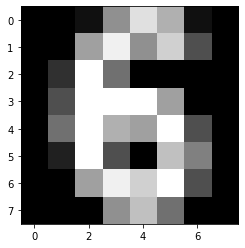

In [5]:
plt.imshow(image[420],cmap='gray')

In [6]:
image=image.reshape(-1,64)

In [7]:
X=digits['data']
print('Image reshaped: ',image.shape)
print('X shape: ',X.shape)
print('Y shape: ',y.shape)

Image reshaped:  (1797, 64)
X shape:  (1797, 64)
Y shape:  (1797,)


In [8]:
#Calculate mean of the dataset
#Mean Vector dimension (1,64)
#Axis 1 is row and axis 0 is column

col_mean=np.mean(image,axis=0)
col_mean.shape

(64,)

In [9]:
# Subtract mean of each column from that column
data_norm = image - col_mean

In [10]:
image.shape[1]

64

In [11]:
# Calculate covariance matrix from subtracted mean
# cov= 1/(image.shape[1])*(sum(n))   #Incorrect

cov=np.dot(data_norm.T,data_norm)/data_norm.shape[0]
print(cov.shape)
covariance=np.cov(data_norm.T)

(64, 64)


In [12]:
covariance

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.8229975 ,  2.40099498, ..., -0.1598953 ,
         0.09851423, -0.07406182],
       [ 0.        ,  2.40099498, 22.60837352, ..., -1.15544033,
         1.41203571,  0.72988047],
       ...,
       [ 0.        , -0.1598953 , -1.15544033, ..., 34.81734839,
        15.64854441,  2.87558266],
       [ 0.        ,  0.09851423,  1.41203571, ..., 15.64854441,
        16.73258202,  4.72078588],
       [ 0.        , -0.07406182,  0.72988047, ...,  2.87558266,
         4.72078588,  3.46005282]])

In [13]:
from scipy.linalg import eigh

eigen_val=eigh(covariance)

In [14]:
eigen_val,eigen_vec=eigh(covariance)
print(eigen_val.shape)
eigen_vec.shape

(64,)


(64, 64)

In [15]:
eigen_vec[:,:2]

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-4.60911333e-16, -7.72995727e-15],
       [ 7.45352599e-16, -1.13460725e-15],
       [-2.90111718e-16,  6.68361623e-16],
       [-6.64842655e-17, -6.64023043e-16],
       [ 1.76162404e-15, -2.56349904e-15],
       [-1.12982083e-14,  2.26536653e-15],
       [ 4.09013815e-14, -8.88044262e-13],
       [-7.33260401e-17, -7.25750169e-15],
       [ 3.07698426e-16, -2.86832824e-16],
       [ 2.96030667e-16, -5.73098439e-15],
       [-6.60103014e-17,  1.77077793e-15],
       [ 3.80699805e-16,  1.06678233e-15],
       [-2.08102162e-15,  9.32409326e-16],
       [ 1.85797933e-14,  6.44115146e-15],
       [-4.01384989e-13,  4.90626473e-12],
       [ 1.15997121e-15,  5.63439398e-15],
       [-5.55761817e-16,  3.30685929e-15],
       [-2.99486494e-16,  7.87086313e-15],
       [ 7.27955011e-17, -1.68963636e-15],
       [-5.89338470e-16, -1.75187207e-15],
       [ 2.57908139e-15, -1.04505106e-15],
       [-5.

In [16]:
# def calc_PCA(n,eigen_val,eigen_vec):
# #     print(eigen_val.shape)
# #     eigen_vec.shape
#     eigen_vec[:,:n]
#     e_val=eigen_val[::-1]
#     values=e_val[:n_components]

# #     print(values.shape)
#     e_vec=eigen_vec[:,::-1]
#     vectors=e_vec[:, :n_components]
# #     print(vectors.shape)
#     dim_low=np.matmul(image,vectors)
# #     dim_low.shape
#     return dim_low
    
    
# def plot_PCA(data):    
#     two_comp_data=pd.DataFrame(data=dim_low,columns=('Principal 1','Principal 2','Principal 3'))

#     plt.figure(figsize=(15,10))
#     plt.xlabel('Principal 1')
#     plt.ylabel('Principal 2')
#     plt.legend()
    
#     if(len(two_comp_data.columns)==2):
#         for label in set(y):
#             d=two_comp_data[y==label]

#             plt.scatter(d['Principal 1'],d['Principal 2'], label=label)
#             plt.title('2D Plot of two principals')

#     elif(len(two_comp_data.columns)==3):
#         for label in set(y):
#             d=two_comp_data[y==label]

#             plt.scatter(d['Principal 1'],d['Principal 2'], d['Principal 3'],label=label)
#             plt.title('3D Plot of two principals')

#         plt.zlabel('Principal 3')
    
#     else:
#         print('Cannot draw graph with n>2')
    

In [17]:
# plot_PCA(calc_PCA(3,eigen_val,eigen_vec))

   ## Dimensional Reduction 

### Task
1. Reverse both eigen values and eigen vector.
2. Number of components=2
3. No eigen values= 2 and eigen vector= 2
4. Lower Dimension: data * eigen vector -> (dimension (1797,2))
5. Visualize lower dimension
6. Find the number of components Formula


### Reverse the eigen value and eigen vector

In [18]:
e_val=eigen_val[::-1]
e_val

array([ 1.79006930e+02,  1.63717747e+02,  1.41788439e+02,  1.01100375e+02,
        6.95131656e+01,  5.91085249e+01,  5.18845391e+01,  4.40151067e+01,
        4.03109953e+01,  3.70117984e+01,  2.85190412e+01,  2.73211698e+01,
        2.19014881e+01,  2.13243565e+01,  1.76367222e+01,  1.69468639e+01,
        1.58513899e+01,  1.50044602e+01,  1.22344732e+01,  1.08868593e+01,
        1.06935663e+01,  9.58259779e+00,  9.22640260e+00,  8.69036872e+00,
        8.36561190e+00,  7.16577961e+00,  6.91973881e+00,  6.19295508e+00,
        5.88499123e+00,  5.15586690e+00,  4.49129656e+00,  4.24687799e+00,
        4.04743883e+00,  3.94340334e+00,  3.70647245e+00,  3.53165306e+00,
        3.08457409e+00,  2.73780002e+00,  2.67210896e+00,  2.54170563e+00,
        2.28298744e+00,  1.90724229e+00,  1.81716569e+00,  1.68996439e+00,
        1.40197220e+00,  1.29221888e+00,  1.15893419e+00,  9.31220008e-01,
        6.69850594e-01,  4.86065217e-01,  2.52350432e-01,  9.91527944e-02,
        6.31307848e-02,  

In [19]:
e_vec=eigen_vec[:,::-1]
e_vec
# print(eigen_vec[0],eigen_vec[2])

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.73094651e-02, -1.01064569e-02, -1.83420720e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.23428835e-01, -4.90849204e-02, -1.26475543e-01, ...,
         0.00000000e+00, -7.72995727e-15, -4.60911333e-16],
       ...,
       [-8.94184677e-02,  1.76697117e-01, -2.32084163e-01, ...,
         0.00000000e+00, -9.14287826e-15,  5.03905802e-16],
       [-3.65977111e-02,  1.94547053e-02, -1.67026563e-01, ...,
         0.00000000e+00, -1.59121694e-15, -3.57451909e-16],
       [-1.14684954e-02, -6.69693895e-03, -3.48043832e-02, ...,
         0.00000000e+00, -3.64273685e-16,  5.02945360e-16]])

In [20]:
a=np.array([[1,2,3],[3,4,5],[5,6,7]])
a
a[:,::-1]

array([[3, 2, 1],
       [5, 4, 3],
       [7, 6, 5]])

### Two components

In [21]:
n_components=2
values=e_val[:n_components]
print(values.shape)

vectors=e_vec[:, :n_components]
print(vectors.shape)

(2,)
(64, 2)


In [22]:
eigen_val.shape

(64,)

### Original Data* vector (Reversed, 2 components selected) --> (1797,2)

In [23]:
dim_low=np.matmul(image,vectors)
dim_low.shape

(1797, 2)

In [24]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# fit_pca=pca.fit_transform(eigen_vec)
# fit_pca
# print(fit_pca[:,0].shape)
# print(fit_pca[:,1].shape)
# print(fit_pca.shape)
# colors=['navy','turquoise']
# plt.figure(figsize=(8,8))
# plt.scatter(fit_pca[:,0],fit_pca[:,1],color='r')
# plt.scatter(fit_pca[:,1],fit_pca[:,0],color='g')

In [25]:
two_comp_data=pd.DataFrame(data=dim_low,columns=('Principal 1','Principal 2'))
two_comp_data

,Principal 1,Principal 2
0,-0.928679,19.554616
1,8.288399,-22.488966
2,7.322710,-11.676253
3,-15.575318,1.612197
4,23.637655,2.548794
...,...,...
1792,-14.275841,11.623857
1793,6.795361,18.847032
1794,11.132071,-8.680519
1795,-4.541313,10.703687


In [26]:
set(y)
two_comp_data

,Principal 1,Principal 2
0,-0.928679,19.554616
1,8.288399,-22.488966
2,7.322710,-11.676253
3,-15.575318,1.612197
4,23.637655,2.548794
...,...,...
1792,-14.275841,11.623857
1793,6.795361,18.847032
1794,11.132071,-8.680519
1795,-4.541313,10.703687


In [27]:
len(two_comp_data.columns)

2

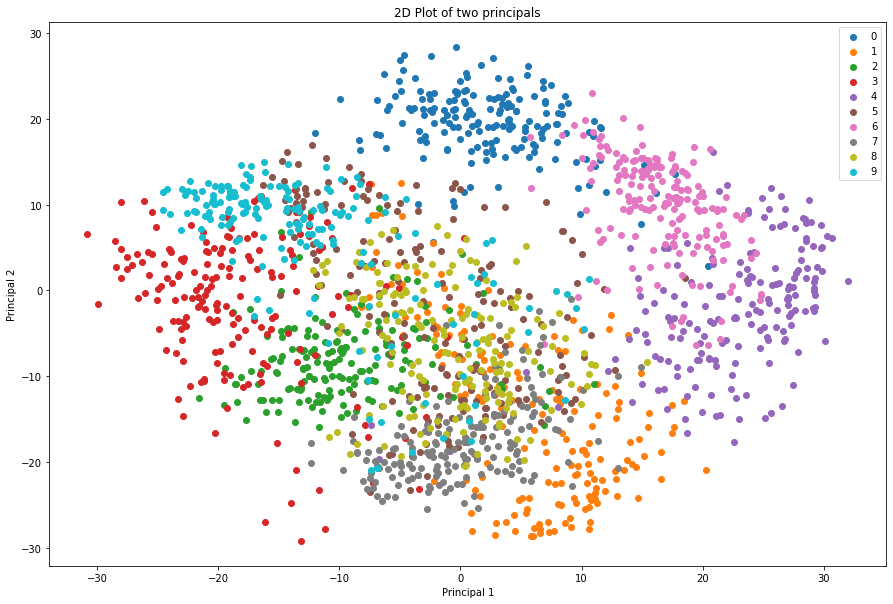

In [28]:
plt.figure(figsize=(15,10))

for label in set(y):
    d=two_comp_data[y==label]
    plt.scatter(d['Principal 1'],d['Principal 2'], label=label)
    
plt.title('2D Plot of two principals')
plt.xlabel('Principal 1')
plt.ylabel('Principal 2')
plt.legend()

# plt.scatter(dim_low[:,0],dim_low[:,1],color='g')

"How many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [29]:
significance=[np.abs(i)/np.sum(eigen_val) for i in eigen_val]

In [30]:
sum(significance)

0.9999999999999999

In [31]:
# total =sum(eigen_val)

# var_exp=[(i/total)*100 for i in eigen_val]
# cum_var_exp=np.cumsum(var_exp)

# plot1=dict(
#     type='bar',
#     x=['PC %s'%i for i in range(40)],
#     y=var_exp,
#     name='Individual'
# )

# plot2=dict(
#     type='scatter',
#     x=['PC %s'%i for i in range(40)],
#     y=cum_var_exp,
#     name='Cumulative'
# )

# data=[d['Principal 1'],d['Principal 2']]


# layout=dict(
#     title='Explained variance by different principal components',
#     yaxis=dict(
#         title='Explained variance in percent'
#     ),
#     annotations=list([
#         dict(
#             x=1.16,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='Explained Variance',
#             showarrow=False,
#         )
#     ])
# )

# fig = dict(data=dim_low, layout=layout)
# py.iplot(fig, filename='selecting-principal-components')

/home/jkarki/.local/lib/python3.6/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [array([[-9.28679193e-01,  1.95546165e+01],
       [ 8.28839856e+00, -2.24889660e+01],
       [ 7.32271022e+00, -1.16762534e+01],
       ...,
       [ 1.11320710e+01, -8.68051925e+00],
       [-4.54131284e+00,  1.07036866e+01],
       [-1.36023738e-02,  4.64528218e+00]])]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])